In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = (256, 256) # IMAGE_SIZE = (3072, 4080)
BATCH_SIZE = 5

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'dates data',
    shuffle=True,
    image_size=IMAGE_SIZE,
    batch_size = BATCH_SIZE,
    seed=42
)
dataset

Found 289 files belonging to 2 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [5]:
class_names = dataset.class_names
class_names

['bad', 'good']

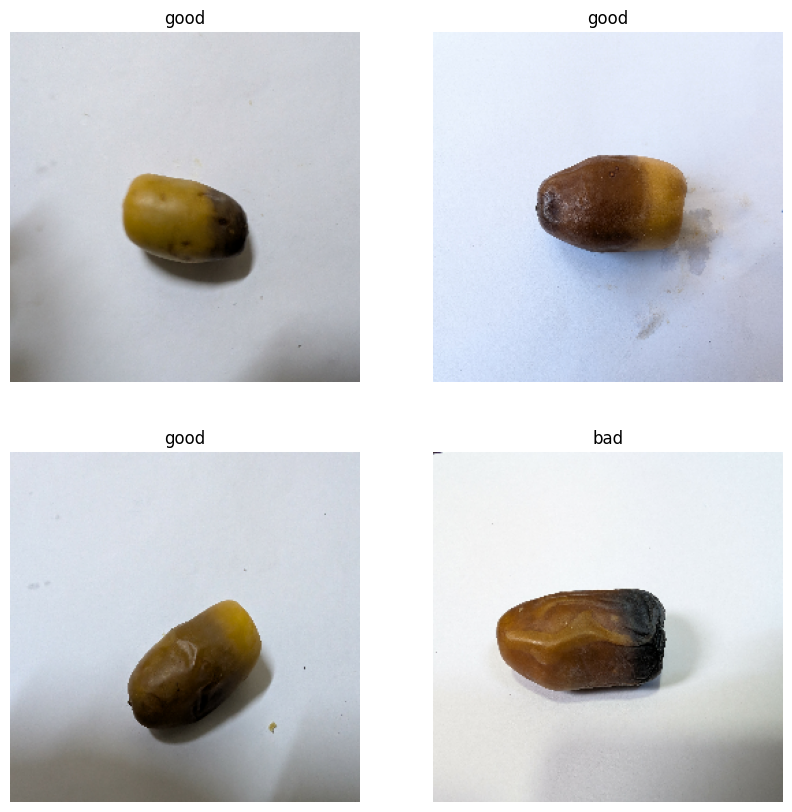

In [6]:
for batch, label in dataset.take(1):
    plt.figure(figsize=(10,10))
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.imshow(batch[i].numpy().astype('uint8'))
        plt.title(class_names[label[i]])
        plt.axis('off')

In [7]:
dataset = dataset.map(lambda x,y:(x/255, tf.one_hot(y, depth=2)))

In [8]:
iterator = dataset.as_numpy_iterator()
iterator.next()[0].max()

0.99607843

In [164]:
len(dataset)

58

In [165]:
train_size = int(len(dataset) *0.7)+2
val_size = int(len(dataset) *0.2)
test_size = int(len(dataset) *0.1)
print(train_size, val_size, test_size)


42 11 5


In [166]:
train = dataset.take(train_size)
val = dataset.skip(train_size).take(train_size)
test = dataset.skip(train_size+val_size).take(train_size)


In [175]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax'),
])

model.build(input_shape=(58, 256, 256, 3))  


In [176]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_67 (Conv2D)              │ (58, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_67 (MaxPooling2D) │ (58, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_68 (Conv2D)              │ (58, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_68 (MaxPooling2D) │ (58, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_69 (Conv2D)              │ (58, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_69 (MaxPooling2D) │ (58, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_70 (Conv2D)              │ (58, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_70 (MaxPooling2D) │ (58, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_71 (Conv2D)              │ (58, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_71 (MaxPooling2D) │ (58, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_72 (Conv2D)              │ (58, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_72 (MaxPooling2D) │ (58, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (58, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (58, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (58, 2)                │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,682 (717.51 KB)

 Trainable params: 183,682 (717.51 KB)

 Non-trainable params: 0 (0.00 B)

In [177]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [178]:
callback = tf.keras.callbacks.TensorBoard(log_dir='logs')

In [179]:
hist = model.fit(
    train,
    epochs=40,
    batch_size = BATCH_SIZE,
    verbose=1,
    validation_data=val,
    callbacks=[callback]
)

Epoch 1/40


42/42 ━━━━━━━━━━━━━━━━━━━━ 22s 390ms/step - accuracy: 0.5060 - loss: 0.7035 - val_accuracy: 0.5063 - val_loss: 0.6939
Epoch 2/40
42/42 ━━━━━━━━━━━━━━━━━━━━ 17s 405ms/step - accuracy: 0.5641 - loss: 0.6584 - val_accuracy: 0.7848 - val_loss: 0.5623
Epoch 3/40
42/42 ━━━━━━━━━━━━━━━━━━━━ 17s 411ms/step - accuracy: 0.7645 - loss: 0.5623 - val_accuracy: 0.7342 - val_loss: 0.5493
Epoch 4/40
42/42 ━━━━━━━━━━━━━━━━━━━━ 16s 368ms/step - accuracy: 0.8674 - loss: 0.3212 - val_accuracy: 0.6835 - val_loss: 0.5381
Epoch 5/40
42/42 ━━━━━━━━━━━━━━━━━━━━ 19s 446ms/step - accuracy: 0.8516 - loss: 0.3277 - val_accuracy: 0.8608 - val_loss: 0.4074
Epoch 6/40
42/42 ━━━━━━━━━━━━━━━━━━━━ 18s 422ms/step - accuracy: 0.9193 - loss: 0.2797 - val_accuracy: 0.8987 - val_loss: 0.3645
Epoch 7/40
42/42 ━━━━━━━━━━━━━━━━━━━━ 17s 407ms/step - accuracy: 0.9115 - loss: 0.2760 - val_accuracy: 0.7595 - val_loss: 1.2711
Epoch 8/40
42/42 ━━━━━━━━━━━━━━━━━━━━ 18s 417ms/step - accuracy: 0.8797 - loss: 0.3109 - val_accuracy: 0.860

In [180]:
model.save('datesModelv2.h5')

In [181]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

p = Precision()
r = Recall()
a = BinaryAccuracy()

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    p.update_state(y, yhat)
    r.update_state(y, yhat)
    a.update_state(y, yhat)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step


In [ ]:
print(p.result, r, a)

Found 289 files belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


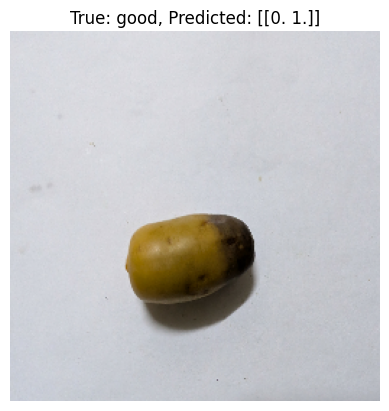

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


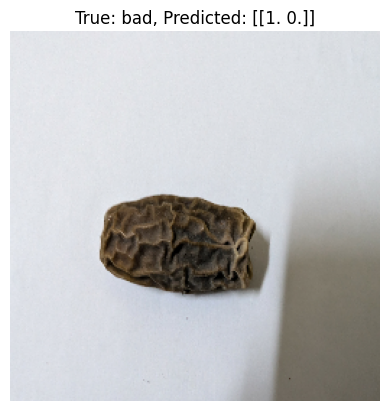

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


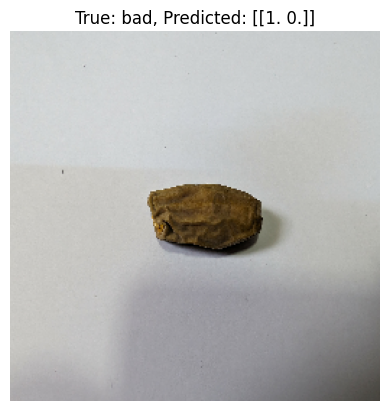

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


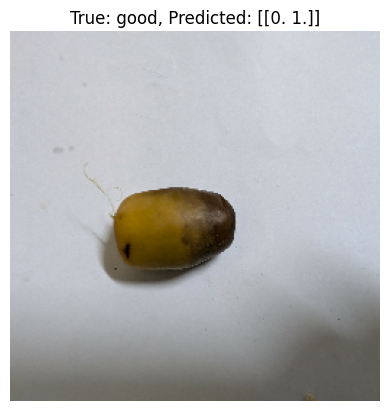

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


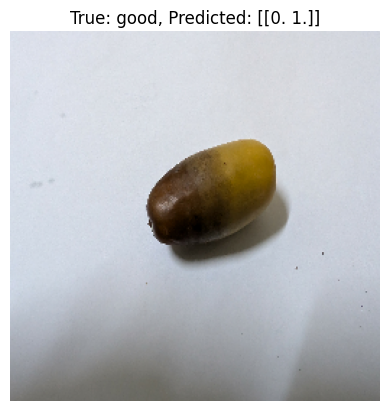

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


KeyboardInterrupt: 

In [21]:
model = tf.keras.models.load_model('datesModelv2.h5')

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'dates data',
    image_size=(256, 256),  
    batch_size=1,  
    label_mode='int',
    shuffle=True
)

class_names = dataset.class_names

for images, labels in dataset:
    for i in range(len(images)): #10 images
        img = images[i].numpy().astype("uint8")
        label = labels[i].numpy()
        
        prediction = model.predict(tf.expand_dims(images[i], axis=0))

        plt.imshow(img)
        plt.title(f"True: {class_names[label]}, Predicted: {prediction}")
        plt.axis('off')
        plt.show()
